# CQF Exercises Binomial Method

Implement the multi-step binomial method as described in the Binomial Method lecture with the following variables and parameters: stock S = 100; interest rate r = 0.05 (continuously compounded) for a call option with strike K = 100, T = 1. Use four time steps. Calculate the value of the option for a range of volatilities and plot the results.
Now with volatility of 0.2, plot the value of the call option as the number of time steps increases.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum


In [5]:
class OptionType(Enum):
    CALL = 1
    PUT = 2


class Node:
    def __init__(self, value, left=None, right=None):
        self.left = left
        self.right = right
        self.value = value

class BinomialTree:

    def __init__(self, root):
        self.root = root
    
    @classmethod
    def build_tree(cls, S, dS, steps, multiplier=True):

        def up(S):
            if multiplier:
                return S * (1+dS)
            else:
                return S + dS

        def down(S):
            if multiplier:
                return S * (1-dS)
            else:
                return S - dS
        
        root = cls._tree(Node(S), up, down, steps)
        return BinomialTree(root)

    @staticmethod
    def _tree(root, up, down, steps):
        parents = [root]
        level = 0
        while level < steps:
            children = []
            while parents:
                node = parents.pop()
                node.left = Node(up(node.value))
                node.right = Node(down(node.value))
                children.append(node.left)
                children.append(node.right)
            parents = children
            level += 1
        return root


def payoff(S, K, option_type: OptionType):
    if option_type == OptionType.CALL:
        return max(S - K, 0)
    else:
        return max(K - S, 0)


def price(node, option_type, K, r, t):
    if node.left is None and node.right is None:
        return payoff(node.value, K, option_type)
    else:
        s0 = node.value
        s1 = node.left.value
        s2 = node.right.value

        v1 = price(node.left, option_type, K, r, t)
        v2 = price(node.right, option_type, K, r, t)
        
        delta = (v1 - v2) / (s1 - s2)
        return np.exp(-r*t) * (v1 - (delta * s1)) + (delta * s0)

In [12]:
S = 100
sigma = 0.2
r = 0
K = 100
steps = 1
T = 1
tstep_size = T / steps

tree = BinomialTree.build_tree(S=S, dS=1, steps=steps, multiplier=False)
v = price(
    node=tree.root,
    option_type=OptionType.CALL,
    K=K,
    r=r,
    t=tstep_size,
)
v

0.5

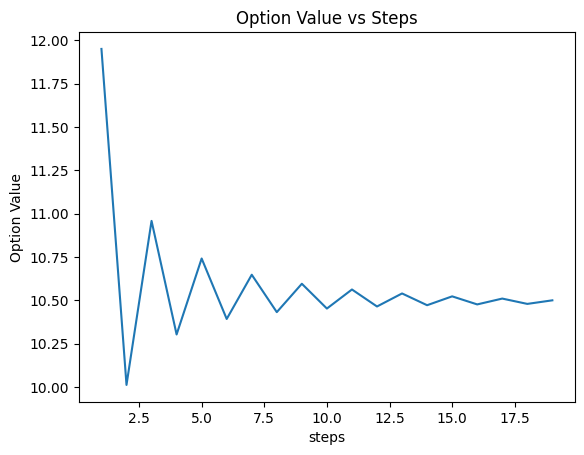

In [13]:
S = 100
sigma = 0.2
r = 0.05
K = 100
T = 1

result = {}
for steps in range(1, 20):
    tstep_size = T / steps
    dS = sigma * (np.sqrt(tstep_size))

    tree = BinomialTree.build_tree(S=S, dS=dS, steps=steps, multiplier=True)
    result[steps] = price(
        tree.root,
        option_type=OptionType.CALL,
        K=K,
        r=r,
        t=tstep_size,
    )

plt.plot(result.keys(), result.values())
plt.xlabel('steps')
plt.ylabel('Option Value')
plt.title('Option Value vs Steps')
plt.show()

A share price is currently £63. At the end of each three-month period, it will change by going up £3 or going down £ 3. Calculate the value of a six-month European put option with strike price £61.
The risk-free interest rate is 4% per annum with continuous compounding.

In [14]:
T = 0.5
steps = 2
tstep_size = T / steps

tree = BinomialTree.build_tree(S=63, dS=3, steps=steps, multiplier=False)
option_value = price(
    tree.root,
    option_type=OptionType.PUT,
    K=61,
    r=0.04,
    t=tstep_size,
)
option_value

0.6178835347038962